In [7]:
# Imports and global variables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from data_processing import zip_data_cleaning


north_zipcodes = [60660, 60626, 60645, 60659, 60646, 60631, 60656, 60630, 60625, 60634, 60641, 
60618, 60657, 60613, 60640, 60651, 60622, 60614, 60647, 60639, 60642]

west_zipcodes = [60644, 60624, 60612]

downtown_zipcodes = [60601, 60602, 60603, 60604, 60605, 60606, 60607, 60610, 60611, 60661, 60654]

south_zipcodes = [60628, 60608, 60616, 60653, 60615, 60609, 60632, 60638, 60629, 60636, 60621, 
60637, 60652, 60620, 60619, 60628, 60643, 60655, 60827, 60623]

east_zipcodes = [60649, 60617, 60633]

region_zip_lst = [north_zipcodes, west_zipcodes, downtown_zipcodes, south_zipcodes, east_zipcodes]


In [8]:
# Utility functions to clean zipcode data
def regions_by_year(region_zip_lst, year):
    '''
    Creates a list of pandas dataframes of food sources based on Chicago regions (North, South, East, West, Downtown) 
    by a given year (2013, 2016, 2019)
    Inputs: region_zip_lst(list): a list of Chicago zipcodes sorted by region
            year(int): a year taken from the master food_source_final.csv (2013, 2016, 2019)
    Returns(list): a list of 5 dataframes, 1 for each region for the given year (ex: North_2013, South_2013, etc.)
    '''
    CLEAN_FOOD_FILE = '~/capp30122/proj-chicago-eats/chicagoeats/data/food_source_final.csv'
    region_yr_lst = []
    chi_food = pd.read_csv(CLEAN_FOOD_FILE)
    for zipcodes in region_zip_lst:
        region_year_df = chi_food[chi_food.zip.isin(zipcodes)]
        region_year_df = region_year_df[region_year_df['year'] == year]
        region_yr_lst.append(region_year_df)
    return region_yr_lst

def region_category_by_year(region_zip_lst, year):
    '''
    Creates dataframes of Chiacago regional food sources 
    Inputs: region_zip_lst(list)
            year(int)
    Returns(list) a list of lists of dataframes of Chicago regions divided by food source categories 
    (ex:north_13_restaurants, north_13_conv, etc.)
    '''
    region_categories = ['Restaurant', 'Convenience Store/Gas Station', 'Grocery Store', 'Liquor Store']
    chi_regions = regions_by_year(region_zip_lst, year)
    category_lst = []
    
    for i, region in enumerate(chi_regions): 
        category_lst.append([])
        for category in region_categories:
            region_category_year = region[region['category'] == category]
            category_lst[i].append(region_category_year)

    return category_lst

def total_food_sources(region_zip_lst, year):
    '''
    Counts the total number of food sources for a Chiacago region for a given year.
    Inputs( list of dataframes): region_categories
    Returns(list): a list of the total number of food sources in a given year for each Chicago region. 
    '''
    total_length_lst = []
    total_source_lst = []
    chi_regions= region_category_by_year(region_zip_lst, year)

    for i, regions in enumerate(chi_regions):
        total_length_lst.append([])
        for categories in regions:
            region_total = len(categories)
            total_length_lst[i].append(region_total)

    for region in total_length_lst: 
        total_food_source = sum(region)
        total_source_lst.append(total_food_source)
    return total_source_lst

    
def category_percent(region_zip_lst, year):
    '''
    Create a list of category percents for a Chicago region for a given year.
    Inputs():
    Returns(lst): a list of lists
    '''
    chi_regions= region_category_by_year(region_zip_lst, year)
    percent_lst = []
    total_length_lst = []

    for i, regions in enumerate(chi_regions):
        total_length_lst.append([])
        for categories in regions:
            region_total = len(categories)
            total_length_lst[i].append(region_total)
 

    for i, region in enumerate(total_length_lst):
        percent_lst.append([])
        for category_total in region: 
            cat_percent = category_total/sum(region)
            percent_lst[i].append(cat_percent)
    return percent_lst
   

Bar graph of each region's total number of food sources for 2013, 2016, 2019

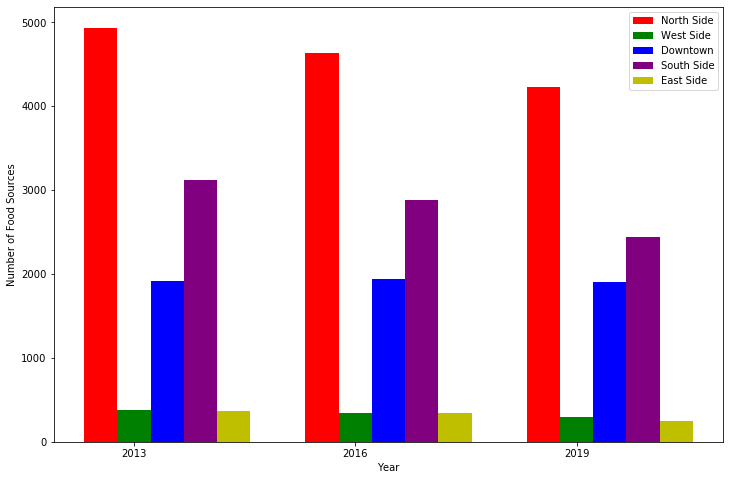

In [9]:
#Bar graph of each region's total number of food sources for 2013, 2016, 2019


(north13_total, west13_total, down13_total, south13_total, east13_total) = total_food_sources(region_zip_lst, 2013)
(north16_total, west16_total, down16_total, south16_total, east16_total) = total_food_sources(region_zip_lst, 2016)
(north19_total, west19_total, down19_total, south19_total, east19_total) = total_food_sources(region_zip_lst, 2019)


x = ['2013', '2016', '2019']
north = [north13_total, north16_total, north19_total]
west = [west13_total, west16_total, west19_total]
down = [down13_total, down16_total, down19_total]
south = [south13_total, south16_total, south19_total]
east = [east13_total, east16_total, east19_total]

fig = plt.subplots(figsize =(12, 8))
width = 0.15
bar1 = np.arange(len(x))
bar2 = [i + width for i in bar1]
bar3 = [i + width for i in bar2]
bar4 = [i + width for i in bar3]
bar5 = [i + width for i in bar4]

plt.bar(bar1, north, width, color = 'r' , label = "North Side")
plt.bar(bar2, west, width, color = 'g' , label = "West Side")
plt.bar(bar3, down, width, color = 'b' , label = "Downtown")
plt.bar(bar4, south, width, color = 'purple' , label = "South Side")
plt.bar(bar5, east, width, color = 'y' , label = "East Side")

plt.xlabel("Year")
plt.ylabel("Number of Food Sources")

plt.xticks(bar1 + width,['2013','2016','2019'])
plt.legend()
  
plt.show()

Chicago Regional Pie Charts, showing the breakdown of the percentage of food source categories for 2019.

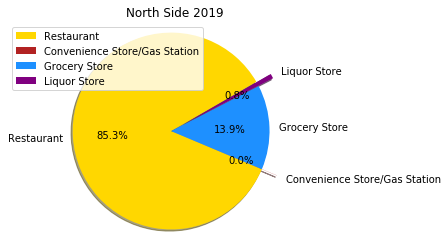

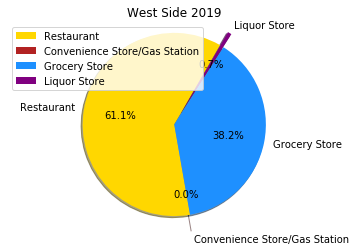

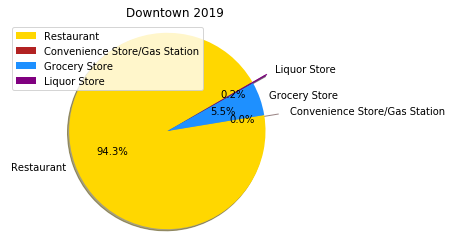

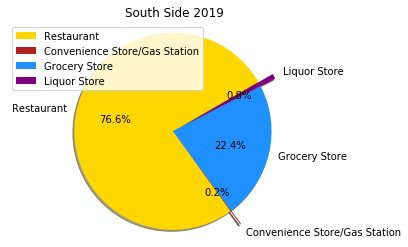

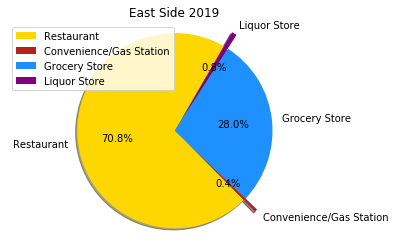

In [10]:
# Chicago Regional Pie Charts

(north19, west19, down19, south19, east19) = category_percent(region_zip_lst, 2019)

#North Side
plt.figure(0)

region_categories = ['Restaurant', 'Convenience Store/Gas Station', 'Grocery Store', 'Liquor Store']
categories_percents = north19

colors = ['gold', 'firebrick', 'dodgerblue', 'purple']

plt.pie(categories_percents, labels = region_categories, colors=colors, startangle=30, shadow = True, 
explode = (0, 0.2, 0, 0.2), radius = 1.2, autopct = '%1.1f%%')

plt.title('North Side 2019')
plt.axis('equal')

plt.legend(loc=2, prop={'size': 10})

#West Side
plt.figure(1)
region_categories = ['Restaurant', 'Convenience Store/Gas Station', 'Grocery Store', 'Liquor Store']
categories_percents = west19

colors = ['gold', 'firebrick', 'dodgerblue', 'purple']

plt.pie(categories_percents, labels = region_categories, colors=colors, startangle=60, shadow = True, 
explode = (0, 0.2, 0, 0.2), radius = 1.2, autopct = '%1.1f%%')

plt.title('West Side 2019')
plt.axis('equal')

plt.legend(loc=2, prop={'size': 10})

#Downtown
plt.figure(2)

region_categories = ['Restaurant', 'Convenience Store/Gas Station', 'Grocery Store', 'Liquor Store']
categories_percents = down19

colors = ['gold', 'firebrick', 'dodgerblue', 'purple']

plt.pie(categories_percents, labels = region_categories, colors=colors, startangle=30, shadow = True, 
explode = (0, 0.2, 0, 0.2), radius = 1.2, autopct = '%1.1f%%')

plt.title('Downtown 2019')
plt.axis('equal')

plt.legend(loc=2, prop={'size': 10})

#South Side
plt.figure(3)
region_categories = ['Restaurant', 'Convenience Store/Gas Station', 'Grocery Store', 'Liquor Store']
categories_percents = south19
colors = ['gold', 'firebrick', 'dodgerblue', 'purple']

plt.pie(categories_percents, labels = region_categories, colors=colors, startangle=30, shadow = True, 
explode = (0, 0.2, 0, 0.2), radius = 1.2, autopct = '%1.1f%%')

plt.title('South Side 2019')
plt.axis('equal')

plt.legend(loc=2, prop={'size': 10})

plt.figure(4)
region_categories = ['Restaurant', 'Convenience/Gas Station', 'Grocery Store', 'Liquor Store']
categories_percents = east19

colors = ['gold', 'firebrick', 'dodgerblue', 'purple']

plt.pie(categories_percents, labels = region_categories, colors=colors, startangle=60, shadow = True, 
explode = (0, 0.2, 0, 0.2), radius = 1.2, autopct = '%1.1f%%')

plt.title('East Side 2019')
plt.axis('equal')

plt.legend(loc=2, prop={'size': 10})

plt.show() 